In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

pv_data = pd.read_csv('power.txt', header=None).dropna(how='all').fillna(0).drop_duplicates()[:10000]
print(pv_data.shape)
def func(x : pd.Series):
    res = x.describe()
    res['skew'] = x.skew()
    res['kurt'] = x.kurt()
    return res
pv_static = pv_data.apply(func, axis=1).drop('count', axis=1)
pv_static.head()

(10000, 7)


mean       std    min     25%    50%     75%    max      skew      kurt
0  1.330571  0.319938  0.996  1.1145  1.340  1.4000  1.949  1.214886  2.058983
1  1.232000  0.167739  0.996  1.1145  1.259  1.3540  1.432 -0.481918 -1.344378
2  1.183286  0.148373  0.996  1.0600  1.200  1.2995  1.368 -0.031286 -1.866381
3  1.107714  0.171524  0.839  1.0125  1.091  1.2295  1.340 -0.208436 -0.593097
4  0.996143  0.236825  0.559  0.9175  1.029  1.1455  1.259 -1.052133  1.084469

In [3]:
def func(x : pd.Series):
    # print(x)
    mean = x['mean'] 
    std = x['std']
    x = x.drop(['mean', 'std'])
    x = x.apply(lambda x: (x - mean) / std)
    return x
pv_standard = pv_static.apply(func, axis=1)
pv_standard.head()

min       25%       50%       75%       max       skew       kurt
0 -1.045737 -0.675353  0.029470  0.217006  1.932961  -0.361586   2.276725
1 -1.406949 -0.700494  0.160964  0.727321  1.192329 -10.217775 -15.359454
2 -1.262262 -0.830917  0.112650  0.783257  1.244931  -8.185931 -20.554042
3 -1.566626 -0.555107 -0.097446  0.710020  1.354244  -7.673259  -9.915865
4 -1.845847 -0.332071  0.138740  0.630664  1.109921  -8.648895   0.372958

In [4]:
from sklearn.preprocessing import StandardScaler
X = pv_static.copy()
X = X.T
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X).T
X = X.T
print('DONE')

DONE


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from sklearn
# 创建一个数据集，用于演示
print(X_scaled.shape)
# DBSCAN模型训练
dbscan = DBSCAN(eps=0.5, min_samples=20)
clusters = dbscan.fit_predict(X_scaled)
print('DONE')


(10000, 9)
DONE


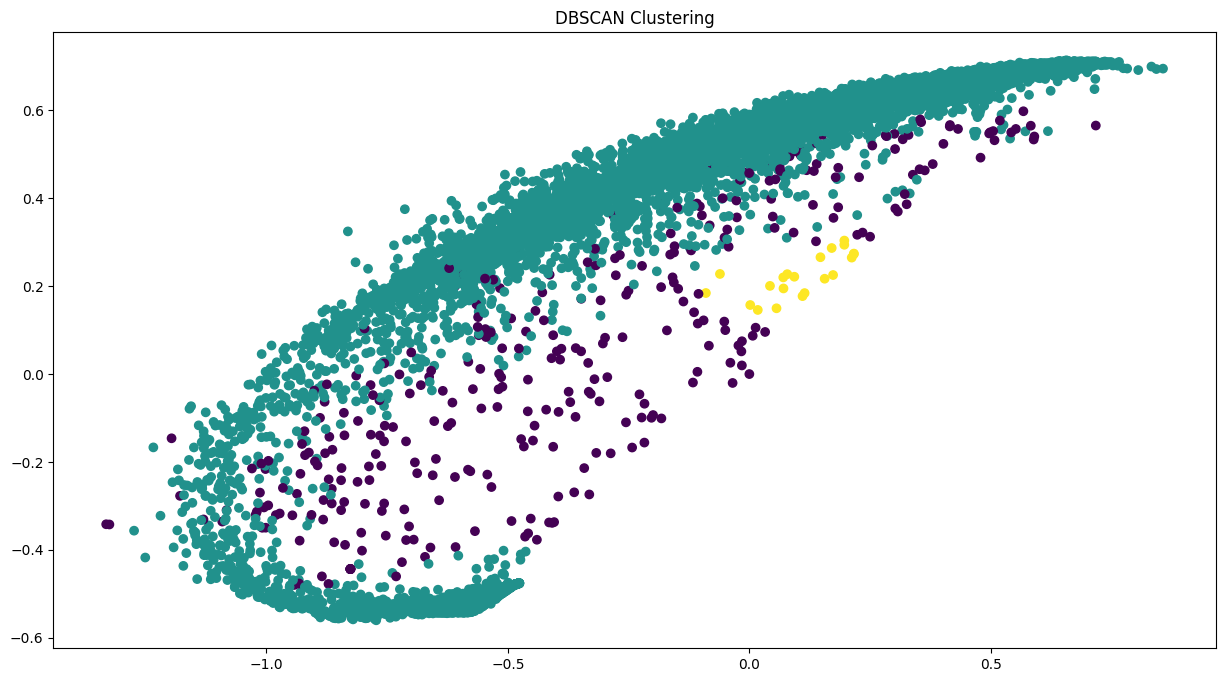

In [20]:
# 绘制结果
plt.figure(figsize=(15, 8))
plt.scatter(X_scaled[:, 3], X_scaled[:, 0], c=clusters)
plt.title('DBSCAN Clustering')
plt.show()

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs

# 创建一个数据集，用于演示
print(X_scaled.shape)
# SVM模型训练
svm = OneClassSVM(nu=0.1, kernel='rbf')
clusters = svm.fit_predict(X_scaled)

(10000, 9)


In [22]:
# 绘制结果
plt.figure(figsize=(15, 8))
plt.scatter(X_scaled[:, 3], X_scaled[:, 0], c=clusters)
plt.title('SVM Outlier Detection')
plt.show()